# Predicting the Price of Second Hand Cars in Cebu City using K-nearest Neighbor and Multiple Regression Algorithm

*•Arnado, Russ Azzi • Degamo, Ma. Lezly Grace • Mayormita, Riza Marie • Perez, Rodel • Tabañag, John Kaizer*

### Overview of the Study
***

The purchasing behavior of customers in the secondhand car market has been affected by the growing popularity of online classified advertisements and auto portals in the Philippines. The digital era’s technological advancements gave birth to various online platforms in which potential customers can explore in their journey of finding a car that would best suit their preferences. Various multi-brand dealers are strategically partnering with online classified advertisements and auto portals to make the car purchasing journey of potential buyers to be more convenient, accessible, and transparent. 

Due to the Tax Reform for Acceleration and Inclusion (TRAIN) Act in the Philippines, new vehicles have become more expensive which results to individuals resorting to certified and non-certified secondhand vehicles. The increase in demand on public transport and ride-sharing services to relieve traffic congestions will also expand the sales of used cars in the Philippines.

Buying secondhand cars may have its advantages (e.g., cheaper) but it also has its risks such determining the reliability of the seller and whether if a used car is overpriced or not. 

To help alleviate the worries of potential used car buyers in their purchasing journey, we will now try to develop a model that would predict the price of secondhand cars and identify which specific features/variables greatly affect it.

Buying used cars has many advantages:

- More savings
- Cheaper insurance cost
- Slower depreciation
- Extended warranty
- Good for the environment
- But there are also risks:

- Unknown reliability or treatment
- More frequent maintenance
- Hard to find an exact match of what you want
- Untouched warranty
- Lemon Car / Overpriced Ca

### Variables Used
***
- ID 
- Title
- Price
- Brand
- Model
- Year of Manufacture
- Used
- Transmission
- Color Family
- Mileage (in km)
- Body Type
- Version
- Description
- Poster
- Poster Type
- Fuel Type
- Location.2
- Date Posted
- name 
- retail
- Post Age





### Population, Data Collection & Sampling
***
The data used for this project are car listings scraped from Carmudi and Philkotse. While, the retail price of the cars are scraped from Priceprice Auto and AutoSearch Manila.


***
## Section One: Import our Libraries
The first thing we need to do is import the libraries we will be using in this tutorial. To visualize our data, we will be using `matplotlib` and `seaborn` to create heatmaps and a scatter matrix. To build our model, we will be using the `sklearn` library, and the evaluation will be taking place with the `statsmodels` library. I've also added a few additional modules to help calculate certain metrics.

In [697]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import date
from dateutil.parser import parse
import numpy as np
from sklearn import preprocessing
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import graphviz
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Section Two: Load the Data into Pandas Paki Edit
After we've loaded our libraries, we can begin the process of importing and exploring our data. I've created an excel file with all the data we will be using in this tutorial. It contains 10 explanatory variables and 1 dependent variable. After we've loaded the data into the data frame, we will need to replace all the `..` values with `nan` as these represent missing values in our dataset. 

In [698]:
cars = pd.read_csv("dataset/080119_pk and carmudi_complete.csv")
cars.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Version,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age
0,CAR006117,White Hyundai Grand Starex 2010 for sale in Ma...,665000,Hyundai,GrandStarex,2010,Yes,Manual,White,1.0,...,NaN,Hyundai Grand Starex 2010 Manual Used for sale...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,HyundaiGrandStarex,2060000,71
1,CAR006652,Selling Red Mitsubishi Mirage G4 2018 in Cainta,528000,Mitsubishi,MirageG4,2018,Yes,Automatic,Red,1.0,...,NaN,Mitsubishi supplies only the best quality vehi...,Gary Reyes,Individual,NaN,Pasig,10/07/2019,MitsubishiMirageG4,735000,22
2,CAR013853,Sell Silver 2011 Toyota Innova in General Sali...,595000,Toyota,Innova,2011,Yes,Manual,Silver,1.0,...,NaN,Toyota Innova 2011 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
3,CAR013855,Red Toyota Innova 2012 Manual Gasoline for sal...,495000,Toyota,Innova,2012,Yes,Manual,Red,1.0,...,NaN,Toyota Innova 2012 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
4,CAR014563,1989 Mercedes-Benz 260E 2.6 AT,255000,Mercedes-Benz,260E,1989,Yes,Automatic,Red,1.0,...,2.6,The 1989 Mercedes-Benz 260E with an Automatic ...,Autofairway - Ric Pandanan,Dealer,Gasoline,Las Pinas,31/05/2019,Mercedes-Benz260E,0,62


# Selecting rows only from Cebu

In [699]:
pd.set_option('display.max_rows', 500)
cars['Location.2'].value_counts()

Quezon City                     2975
Manila                          1892
Quezon                          1813
Makati                          1407
Philippines                     1271
Pasig                           1145
Paranaque                        865
Cebu City                        591
Las Pinas                        590
Marikina                         429
Taguig                           301
Muntinlupa                       300
Mandaue                          263
San Fernando                     257
Cainta                           257
Antipolo                         256
Mandaluyong                      237
Pasay                            210
Santiago                         191
Angeles                          183
General Salipada K. Pendatun     168
Caloocan                         166
Bacoor                           161
Davao City                       141
Valenzuela                       139
Meycauayan                       139
Dasmarinas                       115
I

In [700]:
final_df = cars.loc[(cars["Location.2"]=="Cebu") | (cars["Location.2"]=="Cebu City") | (cars["Location.2"]=="Consolacion")
                  | (cars["Location.2"]=="Cordova") | (cars["Location.2"]=="Danao") | (cars["Location.2"]=="Dumanjug")
                  | (cars["Location.2"]=="Lapu-Lapu")| (cars["Location.2"]=="Liloan")| (cars["Location.2"]=="Mandaue")
                   | (cars["Location.2"]=="Naga")  | (cars["Location.2"]=="Talisay") ]

In [701]:
#replaced null color values as 'No Color'. Same for fuel type.
final_df['Color Family']=final_df['Color Family'].fillna('Other') #('No Color')
final_df['Fuel Type']=final_df['Fuel Type'].fillna('No Fuel Type')

In [702]:
final_df['age_of_car']=2021-final_df['Year of Manufacture']
final_df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age,age_of_car
5,CAR014565,1989 Toyota Crown 3.0 MT,195000,Toyota,Crown,1989,Yes,Manual,White,1.0,...,The 1989 Toyota Crown with an Manual transmiss...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,ToyotaCrown,0,62,32
6,CAR014569,1992 Mazda B2200 2.2 4x2 MT,250000,Mazda,B2200,1992,Yes,Manual,White,1.0,...,The 1992 Mazda B2200 with an Manual transmissi...,Alba Auto Sales,Dealer,Diesel,Mandaue,31/05/2019,MazdaB2200,991800,62,29
18,CAR014654,2000 Ford Expedition 4.6 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,The 2000 Ford Expedition with an Automatic tra...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62,21
19,CAR014656,2000 Ford Expedition 4.6 XLT 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,The 2000 Ford Expedition XLT with an Automatic...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62,21
23,CAR014683,2011 Toyota Corolla Altis 1.6 V AT,419000,Toyota,Corolla Altis,2011,Yes,Automatic,Silver / Grey,1.0,...,The 2011 Toyota Corolla Altis V with an Automa...,Toyota Cebu - Pre Owned Vehicles,Dealer,Gasoline,Cebu,17/06/2019,ToyotaCorollaAltis,1131000,45,10


In [703]:
#deleted Poster, Version and Description
final_df.drop(columns=['Poster','Version','Description','Title','Used','name','Date Posted','Year of Manufacture'],inplace=True,axis=1)

In [704]:
final_df['Location.2'].value_counts()


Cebu City      591
Mandaue        263
Talisay         82
Cebu            68
Lapu-Lapu       45
Naga            25
Consolacion     11
Liloan          11
Cordova          3
Dumanjug         2
Danao            2
Name: Location.2, dtype: int64

In [705]:
final_df=final_df[final_df['age_of_car']>=0]
final_df=final_df[final_df['retail']>0]
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
6,CAR014569,250000,Mazda,B2200,Manual,White,1.0,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,29
18,CAR014654,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,21
19,CAR014656,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,21
23,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,1.0,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,10
30,CAR014768,330000,Ford,Fiesta,Automatic,Blue,1.0,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,9


In [706]:
x=final_df['Mileage (in km)']
y=final_df['age_of_car']

In [707]:
#isolate x and y values that have mileage values in. In other words, we removed blank mileage records.
x_val=final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()]
y_val=final_df['age_of_car'].loc[~final_df['Mileage (in km)'].isnull()]

(0.0, 1000000.0)

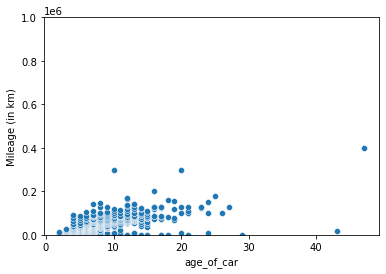

In [708]:
sns.scatterplot(y,x,data=final_df)
plt.ylim(0,1000000)

In [709]:
x_val_trim=x_val[x_val<700000]
y_val_trim=y_val[x_val<700000]

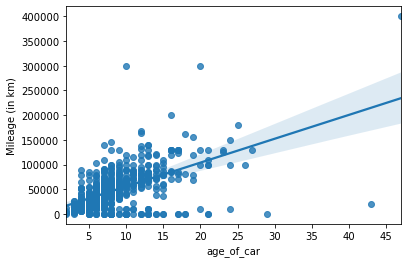

In [710]:
sns.regplot(y_val_trim,x_val_trim,data=final_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_val_trim,x_val_trim)


In [711]:
#gets the age of car with no null values in the mileage
X=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].notnull()])
#gets the age of car with null values in the mileage
X_null=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].isnull()])
#gets the mileage with no null values in the mileage
y=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()])
#gets the mileage with null values in the mileage
y_null=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].isnull()])


In [712]:
#might have to double check the neighbors
clf=KNeighborsRegressor(20,weights='distance')
trained_model=clf.fit(X,y)


In [713]:
#predicting imputed values and setting the index to match the X_null dataframe
imputed_val=pd.DataFrame(trained_model.predict(X_null),columns=['Mileage (in km)'])
X_null.reset_index(inplace=True)

In [714]:
#merge imputed values with your Yr of Manufacture pair
null_merged=pd.merge(X_null,imputed_val,how='outer',on=X_null.index)
#deleted useless key column that came from  the mileage dataframe
null_merged.drop('key_0',inplace=True,axis=1)
#index of Yr of Manufacture is set as the index
null_merged.set_index('index',inplace=True)


In [715]:
# merged them all together (Yr of Manufacture and Mileage) non null records
xy_merged=pd.concat([X,y],axis=1)
# merged the non nulls with the imputed or previous nulls
merged_df=pd.concat([null_merged,xy_merged],axis=0)
# rearranged indedx so it's prettier
merged_df=merged_df.sort_index()
merged_df.head()


,age_of_car,Mileage (in km)
6,29,1.0
18,21,1.0
19,21,1.0
23,10,1.0
30,9,1.0


In [716]:

# merge it with the whole df but original null mileage and age is still there
total_merge=pd.merge(final_df,merged_df,on=final_df.index)
# dropped the original null mileage and age. The new boys are in town!
total_merge.drop(['age_of_car_x','Mileage (in km)_x','key_0'],axis=1,inplace=True)
#renamed them
total_merge.columns=['id','price','brand','model','transmission','color','body_type','poster_type','fuel_type','location','retail','post_age_in_days','age_of_car','mileage_in_km']
total_merge.head()

,id,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
0,CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,29,1.0
1,CAR014654,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
2,CAR014656,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
3,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,10,1.0
4,CAR014768,330000,Ford,Fiesta,Automatic,Blue,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,9,1.0


In [717]:
#made the dataframe prettier by moving the id as index and deleting that pesky id title
total_merge.set_index('id',inplace=True)
total_merge.rename_axis(index=None,inplace=True)
total_merge.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,29,1.0
CAR014654,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
CAR014656,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,10,1.0
CAR014768,330000,Ford,Fiesta,Automatic,Blue,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,9,1.0


In [718]:
total_merge['brand'].value_counts()

Toyota           372
Honda             93
Nissan            93
Mitsubishi        86
Hyundai           84
Ford              77
Kia               67
Isuzu             53
Suzuki            32
Subaru            17
Chevrolet         17
Mazda             12
BMW                5
Jeep               2
Lexus              1
Mercedes-Benz      1
Hummer             1
Bmw                1
Name: brand, dtype: int64

# Merging Categorical Variable With Similar Values

For example, 'BMW' and 'Bmw' are the same car model, just in different letter case or format. In this case we replace 'Bmw' values with 'BMW' in order to only have one unique BMW value when we get dummy variables later on.

In [719]:
total_merge['brand'] = total_merge['brand'].replace(['Bmw'],'BMW')

In [720]:
total_merge['brand'].value_counts()

Toyota           372
Nissan            93
Honda             93
Mitsubishi        86
Hyundai           84
Ford              77
Kia               67
Isuzu             53
Suzuki            32
Subaru            17
Chevrolet         17
Mazda             12
BMW                6
Jeep               2
Lexus              1
Hummer             1
Mercedes-Benz      1
Name: brand, dtype: int64

In [721]:
total_merge['model'].value_counts()

Fortuner              61
Vios                  55
Innova                46
Wigo                  34
Hilux                 31
City                  30
Everest               25
MonteroSport          24
Cr-V                  23
Navara                21
Crosswind             20
Sportage              20
Rio                   19
Civic                 19
Hiace                 18
Almera                17
GrandStarex           17
Camry                 16
D-Max                 16
Nv350Urvan            16
Sorento               15
Corolla               14
Eon                   14
Strada                13
CorollaAltis          13
Rav4                  13
Accent                13
Pajero                12
Avanza                12
Forester              12
LandCruiserPrado      12
Ecosport              12
Picanto               11
Ranger                11
LandCruiser           11
X-Trail               11
Celerio               11
H-100                 10
L300                  10
Montero                9


In [722]:
total_merge['model'] = total_merge['model'].replace(['CorollaAltis'],'Corolla Altis')
total_merge['model'] = total_merge['model'].replace(['Cr-V'],'CR-V')
total_merge['model'] = total_merge['model'].replace(['Ecosport'],'EcoSport')
total_merge['model'] = total_merge['model'].replace(['FjCruiser'],'FJ Cruiser')
total_merge['model'] = total_merge['model'].replace(['GrandStarex'],'Grand Starex')
total_merge['model'] = total_merge['model'].replace(['H100'],'H-100')
total_merge['model'] = total_merge['model'].replace(['Hr-V'],'HR-V')
total_merge['model'] = total_merge['model'].replace(['LandCruiserPrado'],'Land Cruiser Prado')
total_merge['model'] = total_merge['model'].replace(['MirageG4'],'Mirage G4')
total_merge['model'] = total_merge['model'].replace(['Nv350Urvan'],'NV350 Urvan')
total_merge['model'] = total_merge['model'].replace(['Rav4'],'RAV4')

In [723]:
total_merge['model'].value_counts()

Fortuner              61
Vios                  55
Innova                46
Wigo                  34
Hilux                 31
City                  30
CR-V                  27
Everest               25
MonteroSport          24
Navara                21
Sportage              20
Crosswind             20
Rio                   19
Civic                 19
Hiace                 18
Grand Starex          18
Corolla Altis         18
NV350 Urvan           18
Almera                17
Camry                 16
D-Max                 16
RAV4                  16
Sorento               15
Eon                   14
Corolla               14
EcoSport              14
Strada                13
Land Cruiser Prado    13
Accent                13
Forester              12
Pajero                12
Avanza                12
X-Trail               11
H-100                 11
Picanto               11
Ranger                11
LandCruiser           11
Celerio               11
L300                  10
Mirage G4              9


In [724]:
total_merge['transmission'].value_counts()

Automatic     632
Manual        380
Cvt             1
Automanual      1
Name: transmission, dtype: int64

In [725]:
total_merge['color'].value_counts()

White            242
Black            196
Silver           128
Red              119
Blue              77
Grey              69
Brown             33
Silver / Grey     32
Beige             32
Orange            25
Other             21
Pearlwhite         8
Yellow             8
Grayblack          7
Green              7
Pink               3
Purple             2
Gold               2
Skyblue            1
Golden             1
Brightsilver       1
Name: color, dtype: int64

In [726]:
total_merge['color'] = total_merge['color'].replace(['Silver'],'Silver / Grey')
total_merge['color'] = total_merge['color'].replace(['Grey'],'Silver / Grey')
total_merge['color'] = total_merge['color'].replace(['Pearlwhite'],'White')
total_merge['color'] = total_merge['color'].replace(['Skyblue'],'Blue')
total_merge['color'] = total_merge['color'].replace(['Golden'],'Gold')
total_merge['color'] = total_merge['color'].replace(['Brightsilver'],'Silver / Grey')

In [727]:
total_merge['color'].value_counts()

White            250
Silver / Grey    230
Black            196
Red              119
Blue              78
Brown             33
Beige             32
Orange            25
Other             21
Yellow             8
Green              7
Grayblack          7
Pink               3
Gold               3
Purple             2
Name: color, dtype: int64

In [728]:
total_merge['body_type'].value_counts()

SUV                                   340
Saloon / Sedan                        257
MPV / AUV                             105
Pickup / Truck                        103
Hatchback / Wagon                     101
Van / Minivan / Minibus                92
Coupe / Sports Car                     15
Cabriolet / Convertible / Roadster      1
Name: body_type, dtype: int64

In [729]:
total_merge['poster_type'].value_counts()

Dealer        595
Individual    419
Name: poster_type, dtype: int64

In [730]:
total_merge['fuel_type'].value_counts()

Gasoline        371
No Fuel Type    346
Diesel          297
Name: fuel_type, dtype: int64

In [731]:
total_merge['location'].value_counts()

Cebu City      545
Mandaue        247
Talisay         77
Cebu            65
Lapu-Lapu       35
Naga            23
Consolacion     10
Liloan           7
Dumanjug         2
Danao            2
Cordova          1
Name: location, dtype: int64

In [732]:
brand = pd.get_dummies(total_merge["brand"], drop_first=True, prefix="brand")
model = pd.get_dummies(total_merge["model"], drop_first=True, prefix="model")
transmission = pd.get_dummies(total_merge["transmission"], drop_first=True, prefix="transmission")
color = pd.get_dummies(total_merge["color"], drop_first=True, prefix="color")
body_type = pd.get_dummies(total_merge["body_type"], drop_first=True, prefix="body_type")
poster_type = pd.get_dummies(total_merge["poster_type"], drop_first=True, prefix="poster_type")
fuel_type = pd.get_dummies(total_merge["fuel_type"], drop_first=True, prefix="fuel_type")
location = pd.get_dummies(total_merge["location"], drop_first=True, prefix="location")


In [733]:
total_merge.drop("brand", axis=1, inplace=True)
total_merge.drop("model", axis=1, inplace=True)
total_merge.drop("transmission", axis=1, inplace=True)
total_merge.drop("color", axis=1, inplace=True)
total_merge.drop("body_type", axis=1, inplace=True)
total_merge.drop("fuel_type", axis=1, inplace=True)
total_merge.drop("location", axis=1, inplace=True)
total_merge.drop("poster_type", axis=1, inplace=True)
total_merge.head()

,price,retail,post_age_in_days,age_of_car,mileage_in_km
CAR014569,250000,991800,62,29,1.0
CAR014654,250000,4258000,62,21,1.0
CAR014656,250000,4258000,62,21,1.0
CAR014683,419000,1131000,45,10,1.0
CAR014768,330000,875000,62,9,1.0


In [734]:
total_merge = pd.concat([total_merge, brand, model, transmission, color, body_type, poster_type, fuel_type, location], axis=1)
total_merge.head()

,price,retail,post_age_in_days,age_of_car,mileage_in_km,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hummer,brand_Hyundai,...,location_Cebu City,location_Consolacion,location_Cordova,location_Danao,location_Dumanjug,location_Lapu-Lapu,location_Liloan,location_Mandaue,location_Naga,location_Talisay
CAR014569,250000,991800,62,29,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CAR014654,250000,4258000,62,21,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CAR014656,250000,4258000,62,21,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CAR014683,419000,1131000,45,10,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAR014768,330000,875000,62,9,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [735]:
total_merge["IsAffordable"] = np.where(total_merge["price"] <= total_merge["retail"], 1, 0)
total_merge.head()

,price,retail,post_age_in_days,age_of_car,mileage_in_km,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hummer,brand_Hyundai,...,location_Consolacion,location_Cordova,location_Danao,location_Dumanjug,location_Lapu-Lapu,location_Liloan,location_Mandaue,location_Naga,location_Talisay,IsAffordable
CAR014569,250000,991800,62,29,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR014654,250000,4258000,62,21,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR014656,250000,4258000,62,21,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR014683,419000,1131000,45,10,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CAR014768,330000,875000,62,9,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [736]:
# I just reassigned just cause lol
final_df=total_merge.copy()


In [737]:
from sklearn.model_selection import train_test_split
# splitting train and test data
X = final_df.drop("price", axis=1)
y = final_df["price"]
# splitting 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [738]:
from sklearn import linear_model
#Training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [739]:
#Fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

In [740]:
#Accuracy of the model
lr=lr_model.score(X_train, y_train)
print('Accuracy of the Model :',lr)

Accuracy of the Model : 0.8989157461189966


In [741]:
total_merge.tail()

,price,retail,post_age_in_days,age_of_car,mileage_in_km,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hummer,brand_Hyundai,...,location_Consolacion,location_Cordova,location_Danao,location_Dumanjug,location_Lapu-Lapu,location_Liloan,location_Mandaue,location_Naga,location_Talisay,IsAffordable
CAR018809,720000,881000,189,3,6083.60,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR019467,390000,828000,62,13,62634.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR019701,380000,876000,189,12,75951.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR019713,780000,2225000,62,12,75951.85,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
CAR019859,485000,1345000,38,11,69304.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [742]:
import statsmodels.api as sm


X = sm.add_constant(X_train) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     39.13
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          2.44e-250
Time:                        11:48:07   Log-Likelihood:                -11074.
No. Observations:                 811   AIC:                         2.245e+04
Df Residuals:                     660   BIC:                         2.316e+04
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
retail                                0.3884      0.132      2.939      0.003       0.129       0.648
post_age_in_days                    728.8413    265.465      2.746      0.006     207.584    1250.099
age_of_car                         -5.59e+04   2550.466    -21.918      0.000   -6.09e+04   -5.09e+04
mileage_in_km                        -0.2820      0.081     -3.486      0.001      -0.441      -0.123
brand_Chevrolet                    2.884e+05   2.37e+05      1.217      0.224   -1.77e+05    7.54e+05
brand_Ford                         2.228e+05   2.15e+05      1.037      0.300   -1.99e+05    6.45e+05
brand_Honda                        3.164e+05   2.82e+05      1.121      0.263   -2.38e+05    8.71e+05
brand_Hummer                       3.589e+05   2.59e+05      1.384      0.167    -1.5e+05    8.68e+05
brand_Hyundai                      2.042e+05   2.55e+05      0.799      0.424   -2.97e+05    7.06e+05
brand_Isuzu                        1.898e+05   2.41e+05      0.787      0.432   -2.84e+05    6.63e+05
brand_Jeep                         2.662e+05   1.19e+05      2.245      0.025    3.34e+04    4.99e+05
brand_Kia                          2.687e+04   2.53e+05      0.106      0.915   -4.69e+05    5.23e+05
brand_Lexus                        7229.3622   2.22e+05      0.033      0.974   -4.28e+05    4.42e+05
brand_Mazda                        2.931e+05   2.65e+05      1.107      0.269   -2.27e+05    8.13e+05
brand_Mercedes-Benz               -5.941e+05   4.56e+05     -1.304      0.193   -1.49e+06       3e+05
brand_Mitsubishi                   2.198e+05   2.61e+05      0.841      0.400   -2.93e+05    7.33e+05
brand_Nissan                       1.954e+05   2.62e+05      0.744      0.457    -3.2e+05    7.11e+05
brand_Subaru                       2.334e+05   2.28e+05      1.025      0.306   -2.14e+05     6.8e+05
brand_Suzuki                       1.834e+05   2.99e+05      0.614      0.540   -4.04e+05     7.7e+05
brand_Toyota                       4.924e+05   2.45e+05      2.008      0.045    1.09e+04    9.74e+05
model_2                           -1.416e+05   2.48e+05     -0.570      0.569   -6.29e+05    3.46e+05
model_3                           -6.458e+04   1.87e+05     -0.346      0.730   -4.31e+05    3.02e+05
model_320I                        -5.087e+04   3.51e+05     -0.145      0.885    -7.4e+05    6.38e+05
model_323                         -5.226e-09   6.67e-09     -0.783      0.434   -1.83e-08    7.87e-09
model_520D                         7.979e+05   4.44e+05      1.799      0.073   -7.32e+04    1.67e+06
model_86                          -1.709e+05   1.51e+05     -1.132      0.258   -4.67e+05    1.25e+05
model_ASX                         -1.123e+05   2.23e+05     -0.502      0.616   -5.51e+05    3.26e+05
model_Accent           

In [743]:
display(total_merge.isnull().any())

price                                False
retail                               False
post_age_in_days                     False
age_of_car                           False
mileage_in_km                        False
brand_Chevrolet                      False
brand_Ford                           False
brand_Honda                          False
brand_Hummer                         False
brand_Hyundai                        False
brand_Isuzu                          False
brand_Jeep                           False
brand_Kia                            False
brand_Lexus                          False
brand_Mazda                          False
brand_Mercedes-Benz                  False
brand_Mitsubishi                     False
brand_Nissan                         False
brand_Subaru                         False
brand_Suzuki                         False
brand_Toyota                         False
model_2                              False
model_3                              False
model_320I 